<a href="https://colab.research.google.com/github/Vani2130/Quantum-computing/blob/main/Experimental_implementation_of_SPA_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Define the basis states for 3 qubits
basis_states = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]), # |000>
    np.array([0, 1, 0, 0, 0, 0, 0, 0]), # |001>
    np.array([0, 0, 1, 0, 0, 0, 0, 0]), # |010>
    np.array([0, 0, 0, 1, 0, 0, 0, 0]), # |011>
    np.array([0, 0, 0, 0, 1, 0, 0, 0]), # |100>
    np.array([0, 0, 0, 0, 0, 1, 0, 0]), # |101>
    np.array([0, 0, 0, 0, 0, 0, 1, 0]), # |110>
    np.array([0, 0, 0, 0, 0, 0, 0, 1])  # |111>
]

# Define a function to create a density matrix from a pure state
def create_density_matrix(state_vector):
    state_vector = np.array(state_vector, dtype=complex)
    return np.outer(state_vector, state_vector.conj())

# Example: Define a superposition state (|000> + |111>) / sqrt(2)
superposition_state = (basis_states[0] + basis_states[7]) / np.sqrt(2)

# Create the density matrix for this state
density_matrix = create_density_matrix(superposition_state)

# Print the density matrix
print("Density Matrix:")
print(density_matrix)


Density Matrix:
[[0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [2]:
import numpy as np

# Define Pauli matrices
I = np.eye(2)
T = np.array([[1, 0], [0, 1]]) # Transpose operation for single qubit (here it's just identity, since T is the transpose operation)

# Define the Kronecker product for three qubits
I_3 = np.kron(np.kron(I, I), I)
T_3 = np.kron(np.kron(T, I), I)

# Coefficients for the operators
coeff1 = 1/10
coeff2 = 1/5

# Example: Define the initial density matrix ρABC
# Here we use the pure state (|000⟩ + |111⟩) / sqrt(2) as an example
basis_states = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0, 1, 0, 0, 0, 0, 0, 0]),
    np.array([0, 0, 1, 0, 0, 0, 0, 0]),
    np.array([0, 0, 0, 1, 0, 0, 0, 0]),
    np.array([0, 0, 0, 0, 1, 0, 0, 0]),
    np.array([0, 0, 0, 0, 0, 1, 0, 0]),
    np.array([0, 0, 0, 0, 0, 0, 1, 0]),
    np.array([0, 0, 0, 0, 0, 0, 0, 1])
]

# Define a superposition state (|000⟩ + |111⟩) / sqrt(2)
superposition_state = (basis_states[0] + basis_states[7]) / np.sqrt(2)

# Create the density matrix for this state
def create_density_matrix(state_vector):
    state_vector = np.array(state_vector, dtype=complex)
    return np.outer(state_vector, state_vector.conj())

rho_ABC = create_density_matrix(superposition_state)

# Apply the SPA-PT map to the density matrix
rho_A_prime = coeff1 * (np.kron(I, np.kron(I, I)) @ rho_ABC @ np.kron(I, np.kron(I, I)).conj().T) + coeff2 * (np.kron(T, np.kron(I, I)) @ rho_ABC @ np.kron(T, np.kron(I, I)).conj().T)

# Print the resulting density matrix ρA′
print("Density Matrix ρA′:")
print(rho_A_prime)


Density Matrix ρA′:
[[0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]]


In [3]:
import numpy as np

# Define the density matrix ρA' from the previous calculation
# (Using the same ρA' from the previous example)
def create_density_matrix(state_vector):
    state_vector = np.array(state_vector, dtype=complex)
    return np.outer(state_vector, state_vector.conj())

# Define Pauli matrices
I = np.eye(2)
T = np.array([[1, 0], [0, 1]]) # Transpose operation for single qubit (here it's just identity, since T is the transpose operation)

# Define the Kronecker product for three qubits
I_3 = np.kron(np.kron(I, I), I)
T_3 = np.kron(np.kron(T, I), I)

# Coefficients for the operators
coeff1 = 1/10
coeff2 = 1/5

# Example: Define the initial density matrix ρABC
# Here we use the pure state (|000⟩ + |111⟩) / sqrt(2) as an example
basis_states = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0, 1, 0, 0, 0, 0, 0, 0]),
    np.array([0, 0, 1, 0, 0, 0, 0, 0]),
    np.array([0, 0, 0, 1, 0, 0, 0, 0]),
    np.array([0, 0, 0, 0, 1, 0, 0, 0]),
    np.array([0, 0, 0, 0, 0, 1, 0, 0]),
    np.array([0, 0, 0, 0, 0, 0, 1, 0]),
    np.array([0, 0, 0, 0, 0, 0, 0, 1])
]

# Define a superposition state (|000⟩ + |111⟩) / sqrt(2)
superposition_state = (basis_states[0] + basis_states[7]) / np.sqrt(2)

# Create the density matrix for this state
rho_ABC = create_density_matrix(superposition_state)

# Apply the SPA-PT map to the density matrix
rho_A_prime = coeff1 * (np.kron(I, np.kron(I, I)) @ rho_ABC @ np.kron(I, np.kron(I, I)).conj().T) + coeff2 * (np.kron(T, np.kron(I, I)) @ rho_ABC @ np.kron(T, np.kron(I, I)).conj().T)

# Print the resulting density matrix ρA′
print("Density Matrix ρA′:")
print(rho_A_prime)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(rho_A_prime)

# Print the eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Construct and print the projection operators
projection_operators = []
for i in range(len(eigenvalues)):
    eigvec = eigenvectors[:, i]
    projection_operator = np.outer(eigvec, eigvec.conj())
    projection_operators.append(projection_operator)
    print(f"Projection Operator {i+1}:")
    print(projection_operator)


Density Matrix ρA′:
[[0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]]
Eigenvalues:
[0.  0.  0.  0.  0.  0.  0.  0.3]
Projection Operator 1:
[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j -0.5+0.j]
 [ 0. -0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. -0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. -0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. -0.

In [2]:
pip install qiskit-aer


In [3]:
import numpy as np
from qiskit import QuantumCircuit, transpile

In [10]:
!pip install pylatexenc

Density Matrix ρA′:
[[0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j]
 [0.15+0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.  +0.j 0.15+0.j]]
global phase: 2.219
              ┌─────────────┐                                ┌───┐»
q_0: ─|0>─────┤ U3(π/4,0,0) ├────────────────────────────────┤ X ├»
           ┌──┴─────────────┴───┐     ┌─────────────────────┐└─┬─┘»
q_1: ─|0>──┤ U3(π/2,-0.64738,0) ├──■──┤ U3(π/2,π/2,0.64738) ├──■──»
          ┌┴────────────────────┤┌─┴─┐└┬───────────────────┬┘     »
q_2: ─|0>─┤ U3(1.84

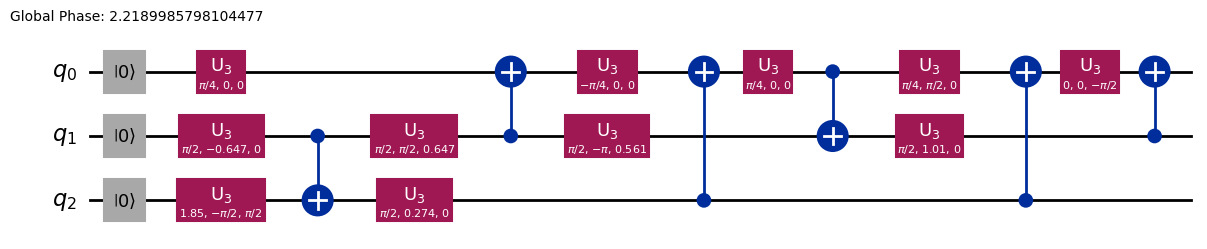

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector, Operator

# Define the density matrix ρA' from the previous calculation
def create_density_matrix(state_vector):
    state_vector = np.array(state_vector, dtype=complex)
    return np.outer(state_vector, state_vector.conj())

# Define Pauli matrices
I = np.eye(2)
T = np.array([[1, 0], [0, 1]]) # Transpose operation for single qubit (here it's just identity, since T is the transpose operation)

# Define the Kronecker product for three qubits
I_3 = np.kron(np.kron(I, I), I)
T_3 = np.kron(np.kron(T, I), I)

# Coefficients for the operators
coeff1 = 1/10
coeff2 = 1/5

# Example: Define the initial density matrix ρABC
# Here we use the pure state (|000⟩ + |111⟩) / sqrt(2) as an example
basis_states = [
    np.array([1, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0, 1, 0, 0, 0, 0, 0, 0]),
    np.array([0, 0, 1, 0, 0, 0, 0, 0]),
    np.array([0, 0, 0, 1, 0, 0, 0, 0]),
    np.array([0, 0, 0, 0, 1, 0, 0, 0]),
    np.array([0, 0, 0, 0, 0, 1, 0, 0]),
    np.array([0, 0, 0, 0, 0, 0, 1, 0]),
    np.array([0, 0, 0, 0, 0, 0, 0, 1])
]

# Define a superposition state (|000⟩ + |111⟩) / sqrt(2)
superposition_state = (basis_states[0] + basis_states[7]) / np.sqrt(2)

# Create the density matrix for this state
rho_ABC = create_density_matrix(superposition_state)

# Apply the SPA-PT map to the density matrix
rho_A_prime = coeff1 * (np.kron(I, np.kron(I, I)) @ rho_ABC @ np.kron(I, np.kron(I, I)).conj().T) + coeff2 * (np.kron(T, np.kron(I, I)) @ rho_ABC @ np.kron(T, np.kron(I, I)).conj().T)

# Print the resulting density matrix ρA′
print("Density Matrix ρA′:")
print(rho_A_prime)

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(rho_A_prime)

# Choose the eigenvector with the largest eigenvalue
index_max = np.argmax(eigenvalues)
eigvec_max = eigenvectors[:, index_max]

# Ensure the state vector is normalized
eigvec_max = eigvec_max / np.linalg.norm(eigvec_max)

# Create the state vector from the eigenvector
state = Statevector(eigvec_max)

# Use Qiskit to create a QuantumCircuit
qc = QuantumCircuit(3)
qc.initialize(state.data, [0, 1, 2])

# Decompose the unitary into a sequence of gates
qc_decomposed = transpile(qc, basis_gates=['u3', 'cx'], optimization_level=3)

# Print the decomposed circuit
print(qc_decomposed)

# Draw the circuit
qc_decomposed.draw('mpl')
